## Test on small data.
Test if the ANN works well on small tractable data set.

In this I check if I could train my implement ANN to perform linear regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ann import ann
import ann_utils
import gd

In [2]:
# ann.activation = ann_utils.sigmoid
# ann.d_activation = ann_utils.d_sigmoid
# ann.output_activation = ann_utils.softmax
# ann.d_output_activation = ann_utils.d_softmax
ann.activation = ann_utils.identity
ann.d_activation = ann_utils.d_identity
ann.output_activation = ann_utils.identity
ann.d_output_activation = ann_utils.d_identity
ann.weight_init = ann_utils.xavier_init
ann.loss = 'mean_squared_error'

ann.num_layers = 1
ann.hidden_size = 1
ann.learning_rate = 0.1

nn = ann(2,1)

In [3]:
print(nn.Ws)
print(nn.bs)
# nn.Ws[0][0][0] = 1
# nn.Ws[1][0][0] = 1
# nn.bs[0][0][0] = 0
# nn.bs[1][0][0] = 0
# print(nn.Ws)
# print(nn.bs)

[array([[ 0.33948969, -0.19487338]]), array([[-1.49533354]])]
[array([[0.94408174]]), array([[0.465154]])]


In [4]:
## Data
x0 = np.array([0])
x1 = np.array([1])
y0 = x0[0]
y1 = x1[0]

# X_train = np.array([x0, x1])
# y_train = np.array([y0, y1])

x0 = np.linspace(0, 1, 1000)
np.random.shuffle(x0)
x1 = np.linspace(0, 1, 1000)
np.random.shuffle(x1)
X_train = np.array([np.array([x0[i], x1[i]]) for i in range(1000)])
y_train = X_train[:, 0] + X_train[:, 1]
y_train.shape
X_train[0].flatten().shape

(2,)

In [5]:
gd.sgd(nn, X_train, y_train)

In [6]:
print('W: ', nn.Ws)
print('b: ', nn.bs)
print('a: ', nn.a)
print('al: ', nn.al)
print('h: ', nn.h)
print('y: ', nn.y)
print(nn.grad_bs)
print(nn.grad_Ws)

W:  [array([[ 0.27457961, -0.32393286]]), array([[-1.33749364]])]
b:  [array([[0.69078031]]), array([[0.6345486]])]
a:  [array([[0.93178825]])]
al:  [[-0.92818022]]
h:  [array([[0.93178825]])]
y:  [[-0.92818022]]
[array([[2.53301425]]), array([[-1.69394599]])]
[array([[0.64910075, 1.29059485]]), array([[-1.57839897]])]


In [7]:
for i in range(100):
    gd.sgd(nn, X_train, y_train)

(1000,)
(1000,)


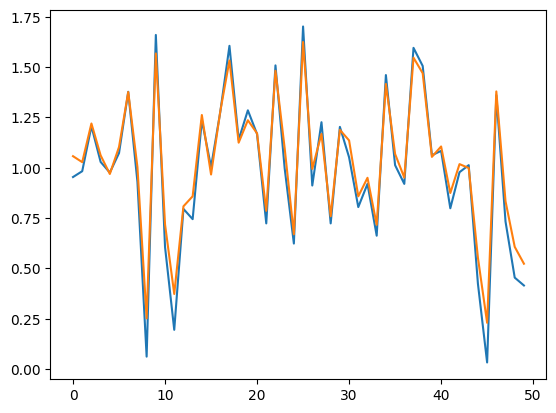

In [8]:
y_pred = []
for i in range(len(y_train)):
    nn.forward_prop(X_train[i])
    y_pred.append(nn.y[0][0])

y_pred = np.array(y_pred)

print(y_pred.shape)
print(y_train.shape)
i = 0
window = 50
plt.plot(y_train[i: i + window])
plt.plot(y_pred[i: i + window])

In [9]:
print(nn.Ws)
print(nn.bs)
print(nn.a)
print(nn.al)
print(nn.h)
print(nn.y)

[array([[-0.54666621, -0.66488721]]), array([[-1.36901027]])]
[array([[0.45120344]]), array([[0.81937045]])]
[array([[0.20437742]])]
[[0.53957566]]
[array([[0.20437742]])]
[[0.53957566]]
